<a href="https://colab.research.google.com/github/kimzn4230/aideeplearning/blob/main/chapter02_mathematical_building_blocks_i%EC%9D%98_%EC%82%AC%EB%B3%B8_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [61]:
from tensorflow.keras.datasets import mnist #데이터로딩
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
mnist.load_data? #설명 볼 수 있음

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [62]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),#첫 번째 은닉층(뉴런 512개)
    layers.Dense(10, activation="softmax") #출력층
])

**The compilation step**

In [63]:
model.compile(optimizer="rmsprop",#경사하강법으로 가중치 조정하여 학습을 최적화
              loss="sparse_categorical_crossentropy", #손실함수(정답이0~9로 숫자로 주어져서 이걸 사용)
              metrics=["accuracy"])

**Preparing the image data**

In [64]:
train_images = train_images.reshape((60000, 28 * 28)) #cnn이 아니라 mlp라서 벡터로 변
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
#데이터셋의 각 이미지는 28*28 크기이고, 각 픽셀은 0~255 사이의 값(흑백강도)를 가짐
#0은 완전 검은색, 255는 완전 흰색
#이렇게 큰 값을 그대로 신경망에 넣으면 학습이 비효율적이고 기울기 소실 발생 가능
#255로 나누면 0~1 범위로 정규화됨

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#데이터셋 전체 60000개를 5번 반복하여 학습
#60000개의 데이터를 한 번에 학습하지 않고 128개씩 묶어서 학습 진행
#60000/128개의 세트 = 약 469번의 학습 스텝이 한 에포크에서 발생
#rmsprop 최적화 알고리즘으로 가중치 조금씩 조정하여 모델 최적화

#1에포크 = 469번 미니배치(128개씩) -> 60000개 학습 완료
#5에포크 = 60000개 데이터 학습을 총 5번 반복
#즉, 469개 미니배치 * 5번 반복 = 총 2345 스텝 학습 진행

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8705 - loss: 0.4431
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1129
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0693
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0361


In [ ]:
test_images.shape

(10000, 784)

**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([5.9248009e-08, 4.7122328e-09, 3.2802796e-05, 1.6271808e-04,
       8.0364201e-11, 5.9669318e-08, 5.6888227e-12, 9.9978948e-01,
       1.4850892e-07, 1.4681627e-05], dtype=float32)

In [ ]:
predictions.shape

(10, 10)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9997895

In [ ]:
test_labels[0]

7

In [ ]:
model.weights

[<Variable path=sequential/dense/kernel, shape=(784, 512), dtype=float32, value=[[-0.04214144  0.00876976  0.02534903 ... -0.01296534  0.01887289
    0.04427629]
  [-0.05277593 -0.04062758  0.05578994 ... -0.01530676  0.01484343
   -0.0457842 ]
  [-0.05904187 -0.04744812 -0.04411095 ... -0.02482184 -0.02128842
    0.016744  ]
  ...
  [-0.05191514 -0.00198281  0.00974743 ...  0.00506839  0.062692
    0.05040145]
  [ 0.04249556  0.00374689 -0.03311305 ...  0.04969839 -0.01655489
   -0.01836618]
  [ 0.01217414 -0.0564162  -0.00671389 ...  0.03892028 -0.05503625
    0.04785154]]>,
 <Variable path=sequential/dense/bias, shape=(512,), dtype=float32, value=[ 0.00638704  0.00660759 -0.03743979  0.08067997  0.02738891 -0.02980836
  -0.03715177  0.05651208  0.05364554  0.08197735 -0.00769255  0.09095103
  -0.00710621  0.00929881  0.01950853 -0.04461978  0.04840131 -0.00465775
   0.01983508 -0.05074668  0.01068646 -0.0364058   0.01267807  0.04621937
   0.04411799  0.02070598  0.04268525 -0.034438

In [ ]:
len(model.weights)

4

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=100) #모델을 100번 업데이트
print(f"test_acc: {test_acc}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0719
test_acc: 0.9815999865531921


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

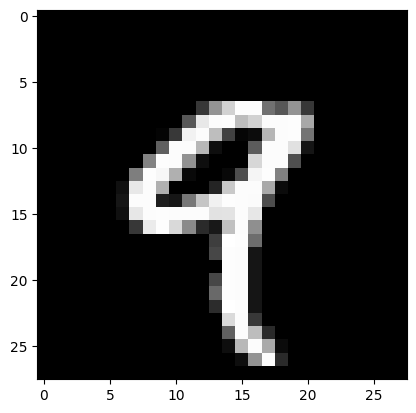

In [ ]:
# prompt: visualize train_image[4]
#시험 때는 사용 불가능, 이런 걸 쓰더라도 코드를 다 이해할 수 있도록 공부하기

import matplotlib.pyplot as plt

plt.imshow(train_images[4], cmap='gray')
plt.show()


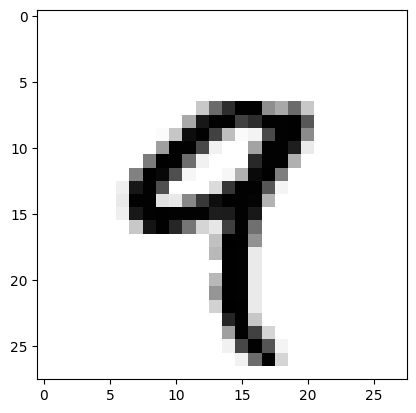

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

✅**원소별 연산**: 각 텐서의 동일한 위치의 원소끼리 수행하는 연산
ex) 덧셈, 뺄셈, 곱셈, 나눗셈, 활성화 함수 적용

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

Q) 위에 x.copy()가 있어야하는 이유?

A) 만약 없으면, ab와 naive_relu(ab)를 확인한 후 ab를 다시 확인하면 기존의 ab가 변해있음을 알 수 있다. 오리지날 매트릭스가 변해있음

-> x.copy()가 있어야 original record가 preserve된다.

In [28]:
import numpy as np

ab=np.ones((2,2))
ab[0,0]=5
ab[1,1]=-1
ab

array([[ 5.,  1.],
       [ 1., -1.]])

In [29]:
naive_relu(ab)

array([[5., 1.],
       [1., 0.]])

In [30]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):  # 좌측에 element wise operation을 사용하는 것보다 아래 vectorized version을 사용하는 것을 추천한다
            x[i, j] += y[i, j]
    return x

Q) 왜 naive version 코드가 더 느린가?

A) naive는 for문처럼 반복문을 사용하여 원소를 하나씩 처리하기 때문 vs 반면에 numpy의 벡터화 연산은 훨씬 빠르다

In [31]:
bb=np.ones(())
ab+bb

array([[6., 2.],
       [2., 0.]])

In [32]:
naive_add(ab,bb)

AssertionError: 

In [10]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [11]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.69 s


### Broadcasting

✅**브로드캐스팅**: 크기가 다른 텐서 간 연산을 가능하게 만드는 기능
-> 작은 텐서가 큰 텐서의 크기에 맞춰 자동으로 확장되며 연산 수행

In [16]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [17]:
X.shape

(32, 10)

In [18]:
y.shape

(10,)

In [19]:
X+y

array([[1.19606063, 1.06480636, 1.87084584, 1.21526368, 1.6268969 ,
        1.10338048, 1.28690147, 0.79548986, 1.3541766 , 0.38898362],
       [1.09393621, 1.72499532, 0.98580487, 1.2938037 , 1.23889142,
        1.6893714 , 1.46944273, 1.69011349, 1.74097999, 0.413901  ],
       [0.48640377, 1.99313637, 1.67320417, 1.59443295, 1.78115746,
        1.47914024, 1.34848194, 1.41123399, 1.50332632, 0.81927862],
       [1.01203179, 1.29239248, 1.04253674, 1.57359355, 1.42122708,
        0.91247831, 1.43359307, 1.43506148, 1.00101216, 0.1197388 ],
       [1.28577171, 1.70912861, 1.14080571, 1.83844689, 1.47789989,
        1.06321421, 1.44077317, 1.42046053, 1.06883222, 0.07672019],
       [1.27417793, 1.09282539, 0.99966445, 1.54618433, 0.87203901,
        1.54355868, 1.23905339, 1.05552196, 0.80505207, 0.1529983 ],
       [0.97404232, 1.88446559, 1.03055945, 1.04342024, 1.15746269,
        1.56957326, 1.05022505, 1.14942913, 1.37698579, 0.0631586 ],
       [1.20709744, 1.47652891, 0.9439993

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

Q) 브로드캐스팅 예제 만들기

A) 아래 코드 참조

In [36]:
from abc import ABC
A = np.array([[1, 2, 3], [4, 5, 6]])  # (2,3) 2행 3열
B = np.array([10, 20, 30]) #1행 3열인데 # (3,) -> 자동으로 (2,3)2행 3열로 확장됨

A # (2,3) 2행 3열

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
B #1행 3열

array([10, 20, 30])

In [34]:
C = A + B  # 브로드캐스팅 적용
print(C)

[[11 22 33]
 [14 25 36]]


### Tensor product

✅**텐서 곱**: 신경망에서 가장 중요한 연산 중 하나로, 주로 행렬 곱셈으로 사용됨, 뉴런 간의 연결 가중치를 적용하는 과정과 관련

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

✅**텐서 변형**: 딥러닝에서는 데이터를 원하는 형태로 변환하는 과정이 필수적

ex) CNN(합성곱 신경망)에서는 2D 이미지를 1D 벡터로 변환해야하고, RNN에서는 시계열 데이터를 배치 크기에 맞게 변형해야함

In [22]:
train_images = train_images.reshape((60000, 28 * 28))

In [23]:
train_images.shape

(60000, 784)

In [24]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [25]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [26]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

-Set x, y are scalar, find derivatives of                                          with respect to x and y. (Set x = 2, y = 1 for the calculation)

-Set x, W and b asx=tf.constant(np.array([1.,4.,3.]).reshape(1,3),dtype=tf.float32)W=tf.Variable(tf.random.uniform((3,2)),dtype=tf.float32)b=tf.Variable(tf.zeros((2,)),dtype=tf.float32)

-Find derivatives of with respect to W and b. (Hint: search for tf.pow() )

-Find derivatives ofwith respect to W and b.






<<< 이 부분 ppt 다시 보기

#### The gradient tape in TensorFlow

In [44]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3 # 여기에 define your function
grad_of_y_wrt_x = tape.gradient(y, x) # dydx를 의미

In [45]:
grad_of_y_wrt_x #위 코드 맨 마지막 줄에 y를 x에 대해 미분하면 결과 2 나오는 걸 보여줌

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [50]:
x = tf.Variable(tf.random.uniform((2, 2))) # 이제 x는 2x2 행렬 & 0과 1 사이의 랜덤 값
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x) # dydx를 의미

In [52]:
grad_of_y_wrt_x # y를 x에 대해 미분하면 결과 2니까 모든 원소가 2인 2행2열 행렬이 됨

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [46]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) # y를 [W,b]에 대해 미분

In [47]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.94639516, 0.94639516],
        [1.250303  , 1.250303  ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [53]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [73]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [74]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [59]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [57]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [65]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [55]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [66]:
def one_training_step(model, images_batch, labels_batch): # one_training_step 함수는
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights) # 가중치 업데이트를 함
    return average_loss

In [67]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [68]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [69]:
def fit(model, images, labels, epochs, batch_size=128): # fit함
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches): # 60000번
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch) # 가중치 업데이트 함수 사용
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [70]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.65
loss at batch 100: 2.20
loss at batch 200: 2.19
loss at batch 300: 2.07
loss at batch 400: 2.17
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.85
loss at batch 200: 1.83
loss at batch 300: 1.70
loss at batch 400: 1.80
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.56
loss at batch 200: 1.50
loss at batch 300: 1.41
loss at batch 400: 1.49
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.33
loss at batch 200: 1.24
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.15
loss at batch 100: 1.15
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 1.01
loss at batch 100: 1.01
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.90
loss at batch 100: 0.91
loss at batch 200: 0.80
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.82
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.77
loss at batch 40

❗
위 코드 결과에서 볼 수 있듯이, loss가 점점 줄어든다

### Evaluating the model

In [72]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}") # 81%

accuracy: 0.81


Q) 완전 초반에는 에포크 = 5로 정확도 90 후반이었는데, 이제는 정확도 80 초반대가 됨

A) initial value를 random으로 받았고
BatchGenerator에서 random

vs

반면에 케라스에서는 랜덤으로 셔플 돌림
케라스에서는 옵티마이저를 SGD 사용 (Adam이면 더 좋을 것이다.)

## Summary